To protect the insurance providers from great loss due to this bad practice. To protect the healthcare system so that they can provide quality and safe care to legitimate patients. To reduce the cost of healthcare services.


# import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as ssn
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn import metrics

# import dataset

In [2]:
data=pd.read_csv('Insurance Dataset.csv')


In [3]:
data

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",...,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,...,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,...,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,...,1.0,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,37.0,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,...,1.0,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,...,3.0,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,New York City,Bronx,1169.0,70 or Older,F,Other Race,Spanish/Hispanic,6,Emergency,Skilled Nursing Home,...,3.0,Medical,0,N,Y,69650.41,13896.82,0.199522,1,3
1048571,New York City,Bronx,1169.0,0 to 17,F,Other Race,Not Span/Hispanic,2,Emergency,Home or Self Care,...,1.0,Medical,0,N,N,13587.38,3918.35,0.288382,1,3
1048572,New York City,Bronx,1169.0,50 to 69,M,Other Race,Spanish/Hispanic,13,Emergency,Medicare Cert Long Term Care Hospital,...,4.0,Medical,0,N,Y,104629.78,24746.64,0.236516,0,3
1048573,New York City,Bronx,1169.0,30 to 49,F,Black/African American,Not Span/Hispanic,2,Emergency,Home or Self Care,...,1.0,Surgical,0,N,Y,27521.41,6766.04,0.245846,1,3


# Data cleaning and Analysis

In [4]:
#shape of DataFrame
data.shape

(1048575, 24)

In [5]:
#data types
data.dtypes

Area_Service                              object
Hospital County                           object
Hospital Id                              float64
Age                                       object
Gender                                    object
Cultural_group                            object
ethnicity                                 object
Days_spend_hsptl                          object
Admission_type                            object
Home or self care,                        object
ccs_diagnosis_code                         int64
ccs_procedure_code                         int64
apr_drg_description                       object
Code_illness                               int64
Mortality risk                           float64
Surg_Description                          object
Weight_baby                                int64
Abortion                                  object
Emergency dept_yes/No                     object
Tot_charg                                float64
Tot_cost            

In [6]:
data.columns

Index(['Area_Service', 'Hospital County', 'Hospital Id', 'Age', 'Gender',
       'Cultural_group', 'ethnicity', 'Days_spend_hsptl', 'Admission_type',
       'Home or self care,', 'ccs_diagnosis_code', 'ccs_procedure_code',
       'apr_drg_description', 'Code_illness', 'Mortality risk',
       'Surg_Description', 'Weight_baby', 'Abortion', 'Emergency dept_yes/No',
       'Tot_charg', 'Tot_cost', 'ratio_of_total_costs_to_total_charges',
       'Result', 'Payment_Typology'],
      dtype='object')

In [7]:
#seperate numerical variables and categorical variables
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()

In [8]:
numeric_cols

['Hospital Id',
 'ccs_diagnosis_code',
 'ccs_procedure_code',
 'Code_illness',
 'Mortality risk',
 'Weight_baby',
 'Tot_charg',
 'Tot_cost',
 'ratio_of_total_costs_to_total_charges',
 'Result',
 'Payment_Typology']

In [9]:
categorical_cols = data.select_dtypes(include='object').columns.tolist() 

In [10]:
categorical_cols

['Area_Service',
 'Hospital County',
 'Age',
 'Gender',
 'Cultural_group',
 'ethnicity',
 'Days_spend_hsptl',
 'Admission_type',
 'Home or self care,',
 'apr_drg_description',
 'Surg_Description',
 'Abortion',
 'Emergency dept_yes/No']

In [11]:
data.isna().sum().sort_values(axis=0, ascending=False
                             )

Area_Service                             2456
Hospital Id                              2456
Hospital County                          2456
Mortality risk                             42
Code_illness                                0
Result                                      0
ratio_of_total_costs_to_total_charges       0
Tot_cost                                    0
Tot_charg                                   0
Emergency dept_yes/No                       0
Abortion                                    0
Weight_baby                                 0
Surg_Description                            0
apr_drg_description                         0
ccs_procedure_code                          0
ccs_diagnosis_code                          0
Home or self care,                          0
Admission_type                              0
Days_spend_hsptl                            0
ethnicity                                   0
Cultural_group                              0
Gender                            

In [12]:
data.nunique().sort_values(ascending=False)

ratio_of_total_costs_to_total_charges    987065
Tot_charg                                869659
Tot_cost                                 766537
apr_drg_description                         316
ccs_diagnosis_code                          262
ccs_procedure_code                          230
Hospital Id                                 143
Days_spend_hsptl                            120
Weight_baby                                  70
Hospital County                              51
Home or self care,                           19
Area_Service                                  7
Admission_type                                6
Code_illness                                  5
Age                                           5
Payment_Typology                              5
Mortality risk                                4
Cultural_group                                4
Surg_Description                              3
ethnicity                                     3
Gender                                  

In [13]:
data['Hospital Id'].unique()

array([3.700e+01,       nan, 3.900e+01, 6.600e+01, 9.800e+01, 1.020e+02,
       1.030e+02, 1.110e+02, 1.140e+02, 2.070e+02, 2.080e+02, 2.100e+02,
       2.110e+02, 2.130e+02, 2.150e+02, 2.160e+02, 2.180e+02, 2.670e+02,
       2.800e+02, 2.920e+02, 3.390e+02, 3.400e+02, 5.650e+02, 5.740e+02,
       5.810e+02, 5.830e+02, 5.850e+02, 7.180e+02, 1.153e+03, 3.067e+03,
       1.160e+02, 1.180e+02, 3.930e+02, 4.090e+02, 4.110e+02, 4.120e+02,
       4.130e+02, 4.140e+02, 4.610e+02, 4.710e+02, 6.710e+02, 6.760e+02,
       6.780e+02, 8.580e+02, 8.660e+02, 8.700e+02, 8.730e+02, 1.028e+03,
       1.158e+03, 5.785e+03, 1.200e+01, 4.200e+01, 4.300e+01, 5.800e+01,
       8.500e+01, 1.280e+02, 1.580e+02, 3.620e+02, 3.670e+02, 3.770e+02,
       3.790e+02, 3.830e+02, 3.970e+02, 4.010e+02, 5.890e+02, 5.970e+02,
       5.980e+02, 5.990e+02, 6.280e+02, 6.300e+02, 6.350e+02, 6.360e+02,
       7.270e+02, 7.980e+02, 8.040e+02, 8.120e+02, 8.150e+02, 8.170e+02,
       9.770e+02, 9.059e+03, 1.000e+00, 2.000e+00, 

In [14]:
#drop this column
data.drop(['Hospital Id'],axis=1,inplace=True)

In [15]:
data

,Area_Service,Hospital County,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",ccs_diagnosis_code,...,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,122,...,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,197,...,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,122,...,1.0,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,122,...,1.0,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,Western NY,Allegany,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,122,...,3.0,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,New York City,Bronx,70 or Older,F,Other Race,Spanish/Hispanic,6,Emergency,Skilled Nursing Home,106,...,3.0,Medical,0,N,Y,69650.41,13896.82,0.199522,1,3
1048571,New York City,Bronx,0 to 17,F,Other Race,Not Span/Hispanic,2,Emergency,Home or Self Care,8,...,1.0,Medical,0,N,N,13587.38,3918.35,0.288382,1,3
1048572,New York City,Bronx,50 to 69,M,Other Race,Spanish/Hispanic,13,Emergency,Medicare Cert Long Term Care Hospital,151,...,4.0,Medical,0,N,Y,104629.78,24746.64,0.236516,0,3
1048573,New York City,Bronx,30 to 49,F,Black/African American,Not Span/Hispanic,2,Emergency,Home or Self Care,143,...,1.0,Surgical,0,N,Y,27521.41,6766.04,0.245846,1,3


In [16]:
data.isna().sum().sort_values(axis=0, ascending=False)

Area_Service                             2456
Hospital County                          2456
Mortality risk                             42
Code_illness                                0
Result                                      0
ratio_of_total_costs_to_total_charges       0
Tot_cost                                    0
Tot_charg                                   0
Emergency dept_yes/No                       0
Abortion                                    0
Weight_baby                                 0
Surg_Description                            0
apr_drg_description                         0
ccs_procedure_code                          0
ccs_diagnosis_code                          0
Home or self care,                          0
Admission_type                              0
Days_spend_hsptl                            0
ethnicity                                   0
Cultural_group                              0
Gender                                      0
Age                               

In [17]:
total_sum_of_null_values=data.isna().sum().sort_values(axis=0, ascending=False).sum()

In [18]:
total_sum_of_null_values

4954

In [19]:
percentage_of_null_values=(total_sum_of_null_values/1048575)*100
percentage_of_null_values

0.4724507069117612

In [20]:
#percentage of null values is very negligible(i.e 0.4)
data.dropna(axis=0,inplace=True)

In [21]:
data.isna().sum()

Area_Service                             0
Hospital County                          0
Age                                      0
Gender                                   0
Cultural_group                           0
ethnicity                                0
Days_spend_hsptl                         0
Admission_type                           0
Home or self care,                       0
ccs_diagnosis_code                       0
ccs_procedure_code                       0
apr_drg_description                      0
Code_illness                             0
Mortality risk                           0
Surg_Description                         0
Weight_baby                              0
Abortion                                 0
Emergency dept_yes/No                    0
Tot_charg                                0
Tot_cost                                 0
ratio_of_total_costs_to_total_charges    0
Result                                   0
Payment_Typology                         0
dtype: int6

In [22]:
data.shape

(1046077, 23)

In [23]:
#Droping unnecessary columns
corr=data.corr().round(3)
corr

,ccs_diagnosis_code,ccs_procedure_code,Code_illness,Mortality risk,Weight_baby,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
ccs_diagnosis_code,1.000,0.051,-0.182,-0.269,0.035,-0.077,-0.042,0.031,0.001,-0.076
ccs_procedure_code,0.051,1.000,0.012,-0.036,0.118,0.025,0.033,0.017,-0.000,-0.052
Code_illness,-0.182,0.012,1.000,0.636,-0.270,0.291,0.248,-0.034,0.001,0.158
Mortality risk,-0.269,-0.036,0.636,1.000,-0.222,0.222,0.183,-0.037,0.002,0.183
Weight_baby,0.035,0.118,-0.270,-0.222,1.000,-0.103,-0.100,0.019,-0.000,-0.125
Tot_charg,-0.077,0.025,0.291,0.222,-0.103,1.000,0.724,-0.043,-0.002,0.082
Tot_cost,-0.042,0.033,0.248,0.183,-0.100,0.724,1.000,0.421,-0.002,0.057
ratio_of_total_costs_to_total_charges,0.031,0.017,-0.034,-0.037,0.019,-0.043,0.421,1.000,0.001,-0.035
Result,0.001,-0.000,0.001,0.002,-0.000,-0.002,-0.002,0.001,1.000,0.001
Payment_Typology,-0.076,-0.052,0.158,0.183,-0.125,0.082,0.057,-0.035,0.001,1.000


In [24]:
raw_data = data.copy()
raw_data


,Area_Service,Hospital County,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",ccs_diagnosis_code,...,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,122,...,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,197,...,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,122,...,1.0,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,122,...,1.0,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,Western NY,Allegany,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,122,...,3.0,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,New York City,Bronx,70 or Older,F,Other Race,Spanish/Hispanic,6,Emergency,Skilled Nursing Home,106,...,3.0,Medical,0,N,Y,69650.41,13896.82,0.199522,1,3
1048571,New York City,Bronx,0 to 17,F,Other Race,Not Span/Hispanic,2,Emergency,Home or Self Care,8,...,1.0,Medical,0,N,N,13587.38,3918.35,0.288382,1,3
1048572,New York City,Bronx,50 to 69,M,Other Race,Spanish/Hispanic,13,Emergency,Medicare Cert Long Term Care Hospital,151,...,4.0,Medical,0,N,Y,104629.78,24746.64,0.236516,0,3
1048573,New York City,Bronx,30 to 49,F,Black/African American,Not Span/Hispanic,2,Emergency,Home or Self Care,143,...,1.0,Surgical,0,N,Y,27521.41,6766.04,0.245846,1,3


In [25]:
#Handling numeric missing value

In [27]:
raw_data[numeric_cols].isnull().sum().sort_values(ascending=False)

KeyError: "['Hospital Id'] not in index"

In [83]:
from sklearn.impute import SimpleImputer

In [84]:
#replace numeric colums
imputer = SimpleImputer(strategy='mean').fit(raw_data[numeric_cols])

In [85]:
raw_data[numeric_cols]=imputer.transform(raw_data[numeric_cols])

In [86]:
raw_data[numeric_cols].isnull().sum()

ccs_diagnosis_code                       0
ccs_procedure_code                       0
Code_illness                             0
Mortality risk                           0
Weight_baby                              0
Tot_charg                                0
Tot_cost                                 0
ratio_of_total_costs_to_total_charges    0
Result                                   0
Payment_Typology                         0
dtype: int64

In [87]:
imp = SimpleImputer(missing_values=np.nan,strategy='most_frequent').fit(raw_data[categorical_cols])

In [88]:
raw_data[categorical_cols]=imp.transform(raw_data[categorical_cols])

In [89]:
raw_data[categorical_cols].isnull().sum()

Area_Service             0
Hospital County          0
Age                      0
Gender                   0
Cultural_group           0
ethnicity                0
Days_spend_hsptl         0
Admission_type           0
Home or self care,       0
apr_drg_description      0
Surg_Description         0
Abortion                 0
Emergency dept_yes/No    0
dtype: int64

In [90]:
#check in the duplicated records
raw_data[raw_data.duplicated()]

,Area_Service,Hospital County,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",ccs_diagnosis_code,...,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
1125,Western NY,Allegany,0 to 17,M,White,Not Span/Hispanic,2,Newborn,Home or Self Care,218.0,...,1.0,Medical,3700.0,N,N,1678.75,737.21,0.439141,1.0,1.0
3086,Western NY,Cattaraugus,0 to 17,M,White,Not Span/Hispanic,2,Newborn,Home or Self Care,218.0,...,1.0,Medical,3600.0,N,N,1251.50,829.70,0.662961,0.0,1.0
3226,Western NY,Cattaraugus,0 to 17,F,White,Not Span/Hispanic,2,Newborn,Home or Self Care,218.0,...,1.0,Medical,2700.0,N,N,1150.50,788.65,0.685486,1.0,1.0
4209,Western NY,Cattaraugus,0 to 17,F,White,Not Span/Hispanic,2,Newborn,Home or Self Care,218.0,...,1.0,Medical,2700.0,N,N,1150.50,788.65,0.685486,1.0,1.0
4234,Western NY,Cattaraugus,0 to 17,F,White,Not Span/Hispanic,2,Newborn,Home or Self Care,218.0,...,1.0,Medical,2800.0,N,N,1150.50,788.65,0.685486,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015327,New York City,Bronx,0 to 17,F,Other Race,Not Span/Hispanic,2,Newborn,Home or Self Care,218.0,...,1.0,Medical,2900.0,N,N,5955.85,1303.62,0.218881,1.0,3.0
1025529,New York City,Bronx,0 to 17,F,Other Race,Spanish/Hispanic,2,Elective,Home or Self Care,83.0,...,1.0,Medical,0.0,N,N,12500.00,2960.11,0.236809,1.0,3.0
1028997,New York City,Bronx,0 to 17,F,Other Race,Spanish/Hispanic,2,Elective,Home or Self Care,83.0,...,1.0,Medical,0.0,N,N,12557.00,2963.40,0.235996,1.0,2.0
1035973,New York City,Bronx,0 to 17,F,Other Race,Spanish/Hispanic,2,Elective,Home or Self Care,83.0,...,1.0,Medical,0.0,N,N,12500.00,2960.11,0.236809,1.0,3.0


In [91]:
#Removing the duplicated rows
raw_data=raw_data.drop_duplicates()

In [92]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041263 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Area_Service                           1041263 non-null  object 
 1   Hospital County                        1041263 non-null  object 
 2   Age                                    1041263 non-null  object 
 3   Gender                                 1041263 non-null  object 
 4   Cultural_group                         1041263 non-null  object 
 5   ethnicity                              1041263 non-null  object 
 6   Days_spend_hsptl                       1041263 non-null  object 
 7   Admission_type                         1041263 non-null  object 
 8   Home or self care,                     1041263 non-null  object 
 9   ccs_diagnosis_code                     1041263 non-null  float64
 10  ccs_procedure_code                     104

# EDA

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046077 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Area_Service                           1046077 non-null  object 
 1   Hospital County                        1046077 non-null  object 
 2   Age                                    1046077 non-null  object 
 3   Gender                                 1046077 non-null  object 
 4   Cultural_group                         1046077 non-null  object 
 5   ethnicity                              1046077 non-null  object 
 6   Days_spend_hsptl                       1046077 non-null  object 
 7   Admission_type                         1046077 non-null  object 
 8   Home or self care,                     1046077 non-null  object 
 9   ccs_diagnosis_code                     1046077 non-null  int64  
 10  ccs_procedure_code                     104

In [99]:
data.describe()

,ccs_diagnosis_code,ccs_procedure_code,Code_illness,Mortality risk,Weight_baby,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
count,1.046077e+06,1.046077e+06,1.046077e+06,1.046077e+06,1.046077e+06,1.046077e+06,1.046077e+06,1.046077e+06,1.046077e+06,1.046077e+06
mean,1.987849e+02,9.721496e+01,2.052845e+00,1.749909e+00,2.937411e+02,2.711541e+04,1.047173e+04,4.563692e-01,7.500194e-01,1.936301e+00
std,1.653710e+02,8.735917e+01,9.146874e-01,9.866929e-01,9.496626e+02,5.491814e+04,2.230118e+04,8.009643e-01,4.330017e-01,7.717380e-01
min,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,3.100000e-01,1.000000e-01,3.312909e-02,0.000000e+00,1.000000e+00
25%,1.080000e+02,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,7.409250e+03,3.237180e+03,3.135364e-01,1.000000e+00,1.000000e+00
50%,1.590000e+02,8.900000e+01,2.000000e+00,1.000000e+00,0.000000e+00,1.460892e+04,5.934830e+03,4.091162e-01,1.000000e+00,2.000000e+00
75%,2.180000e+02,1.740000e+02,3.000000e+00,3.000000e+00,0.000000e+00,2.917954e+04,1.135572e+04,5.191341e-01,1.000000e+00,3.000000e+00
max,6.700000e+02,2.310000e+02,4.000000e+00,4.000000e+00,9.000000e+03,6.196974e+06,2.562478e+06,1.575596e+02,1.000000e+00,5.000000e+00


In [100]:
data.head()

,Area_Service,Hospital County,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",ccs_diagnosis_code,...,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,122,...,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,197,...,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,122,...,1.0,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,122,...,1.0,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,Western NY,Allegany,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,122,...,3.0,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1


<AxesSubplot:>

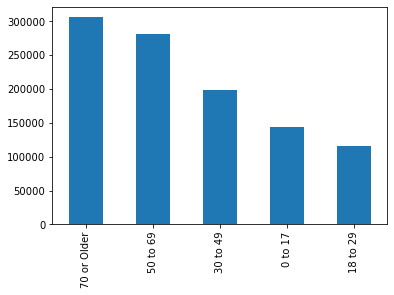

In [110]:
data.Age.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Tot_cost', ylabel='Density'>

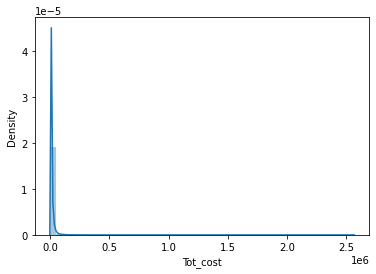

In [113]:
sns.distplot(data['Tot_cost'])

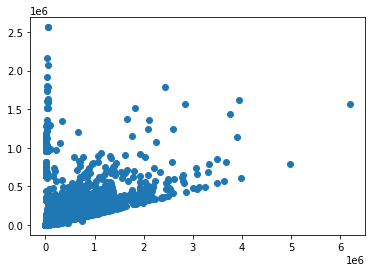

In [111]:
plt.scatter(data['Tot_charg'],y=data['Tot_cost'])

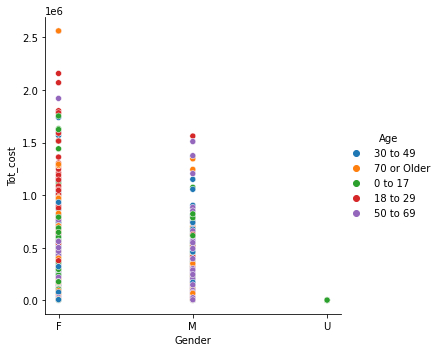

In [101]:
sns.relplot(x= 'Gender', y='Tot_cost', hue='Age', data=data)

<AxesSubplot:xlabel='Admission_type', ylabel='Tot_charg'>

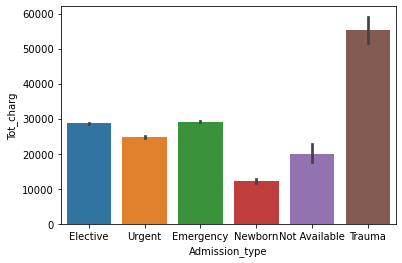

In [112]:
sns.barplot(x='Admission_type',y='Tot_charg',data=data)

<AxesSubplot:xlabel='Mortality risk', ylabel='Density'>

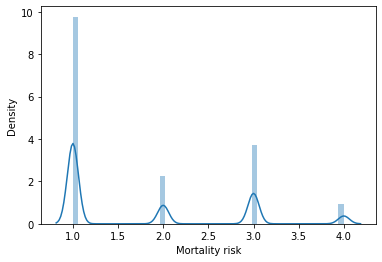

In [102]:
sns.distplot(data['Mortality risk'])

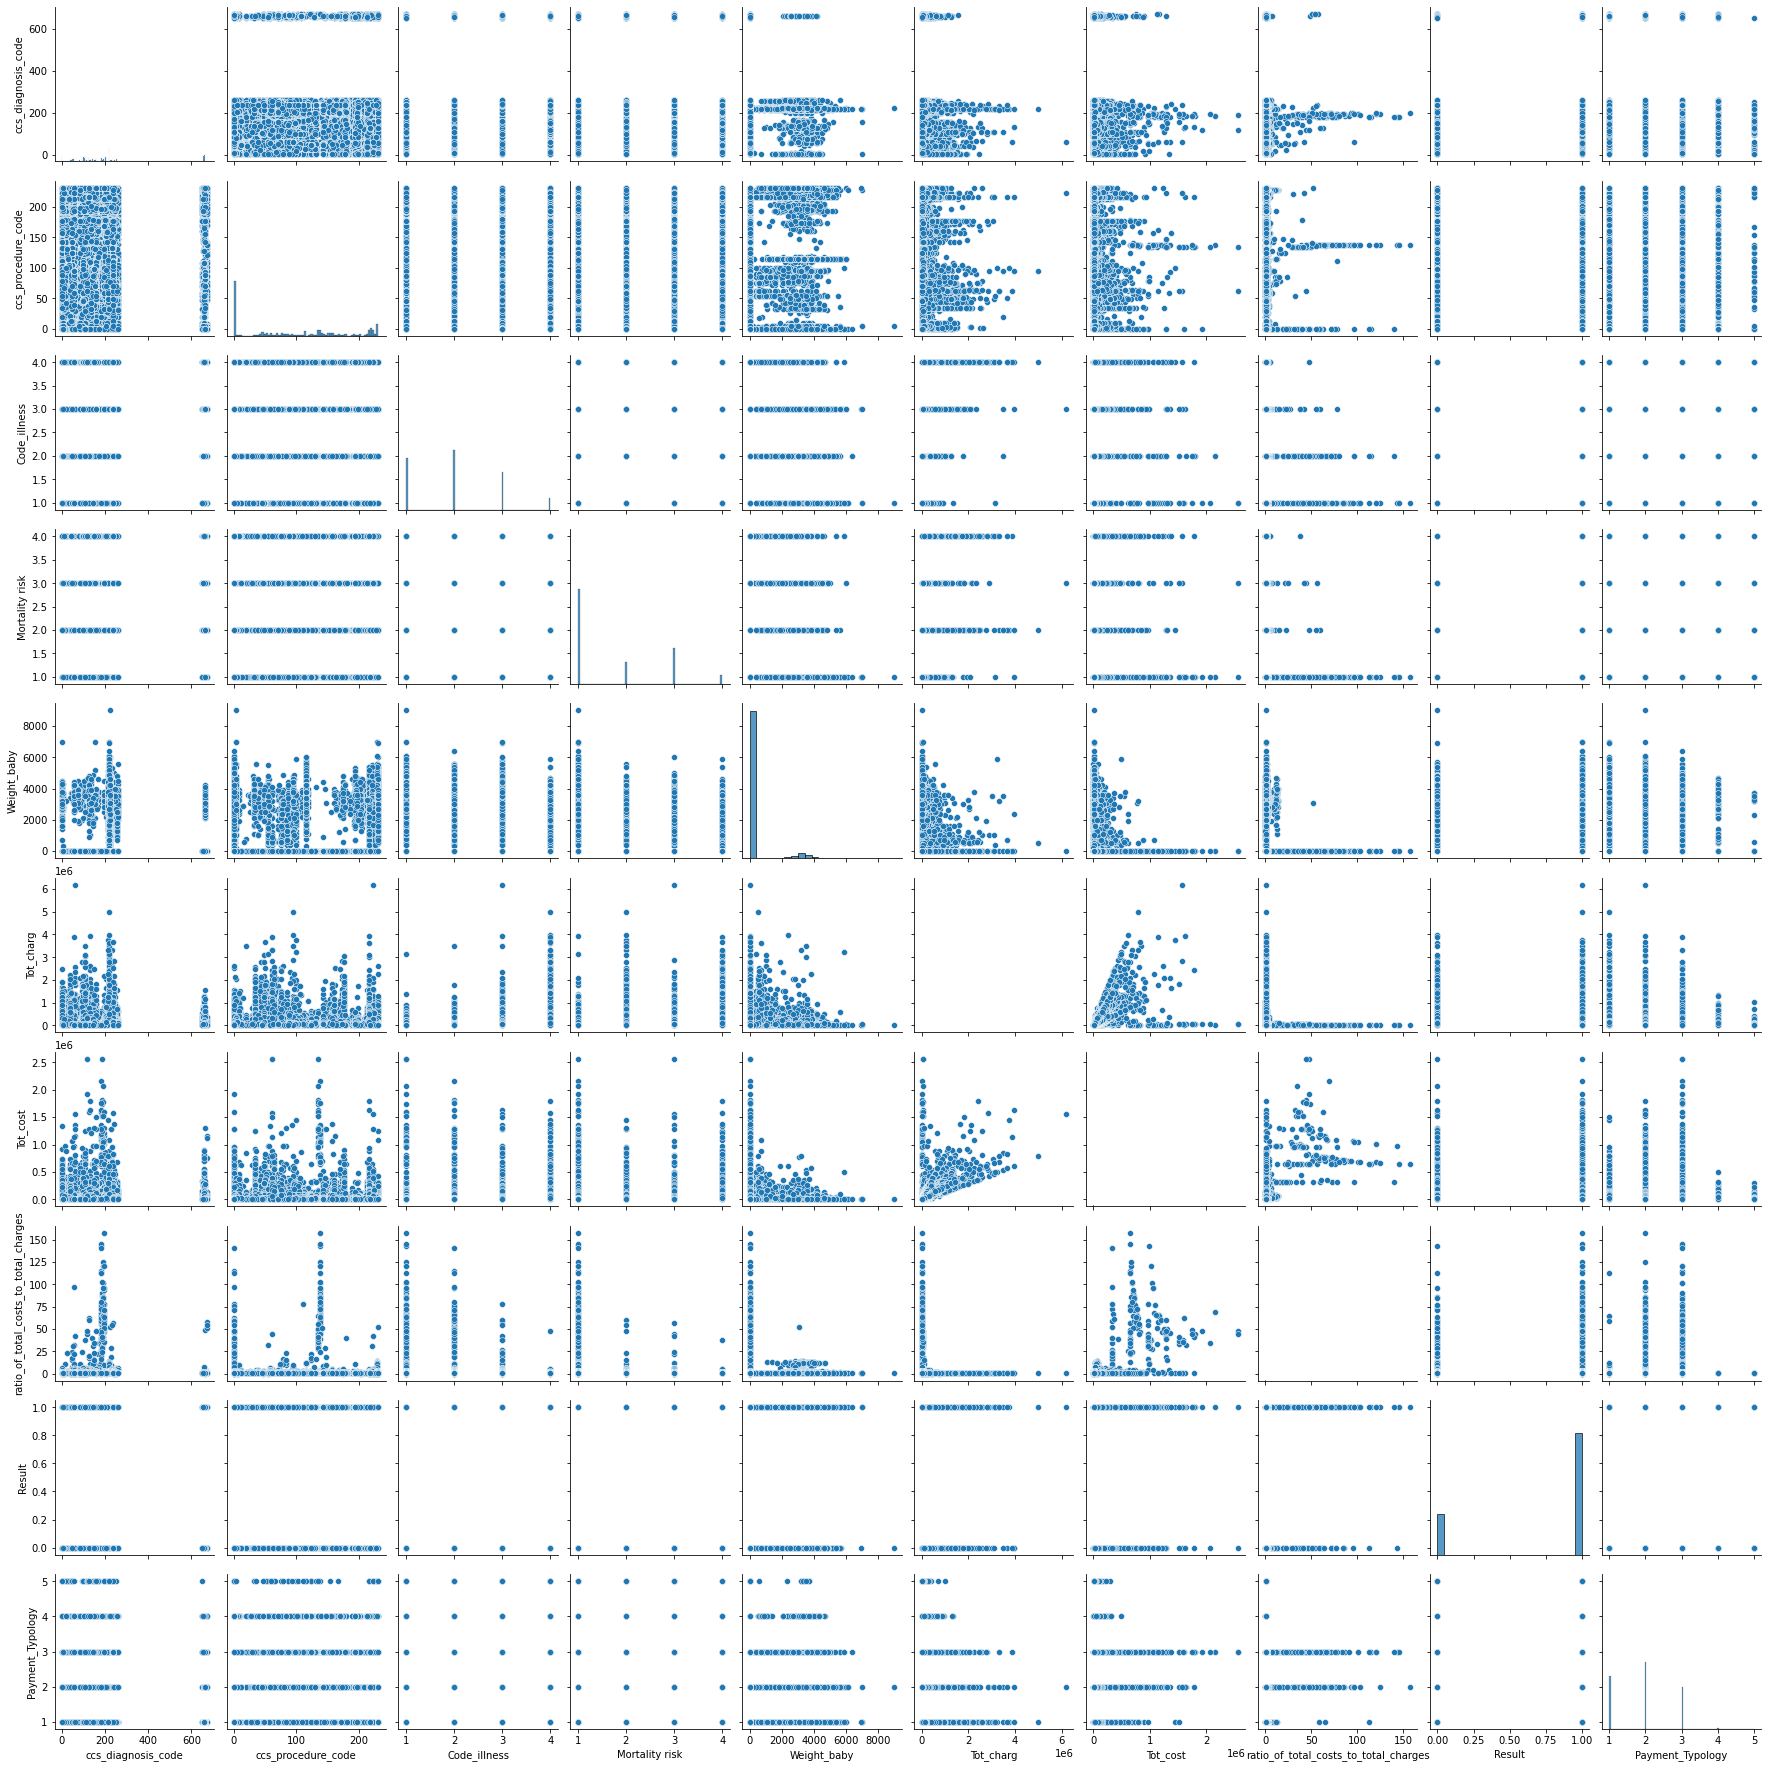

In [105]:
sns.pairplot(data)

In [114]:
#relationship analysis
corr=data.corr()
corr

,ccs_diagnosis_code,ccs_procedure_code,Code_illness,Mortality risk,Weight_baby,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
ccs_diagnosis_code,1.000000,0.051151,-0.181957,-0.269434,0.035353,-0.076550,-0.042181,0.030726,0.000675,-0.075757
ccs_procedure_code,0.051151,1.000000,0.012099,-0.035872,0.118114,0.025029,0.033357,0.017449,-0.000010,-0.051937
Code_illness,-0.181957,0.012099,1.000000,0.636373,-0.270207,0.291385,0.247621,-0.034124,0.000755,0.157857
Mortality risk,-0.269434,-0.035872,0.636373,1.000000,-0.222051,0.222496,0.182678,-0.037166,0.001568,0.183370
Weight_baby,0.035353,0.118114,-0.270207,-0.222051,1.000000,-0.102808,-0.100451,0.018685,-0.000326,-0.124634
Tot_charg,-0.076550,0.025029,0.291385,0.222496,-0.102808,1.000000,0.723744,-0.043260,-0.001584,0.081540
Tot_cost,-0.042181,0.033357,0.247621,0.182678,-0.100451,0.723744,1.000000,0.420770,-0.001859,0.057200
ratio_of_total_costs_to_total_charges,0.030726,0.017449,-0.034124,-0.037166,0.018685,-0.043260,0.420770,1.000000,0.000562,-0.034833
Result,0.000675,-0.000010,0.000755,0.001568,-0.000326,-0.001584,-0.001859,0.000562,1.000000,0.000574
Payment_Typology,-0.075757,-0.051937,0.157857,0.183370,-0.124634,0.081540,0.057200,-0.034833,0.000574,1.000000


<AxesSubplot:>

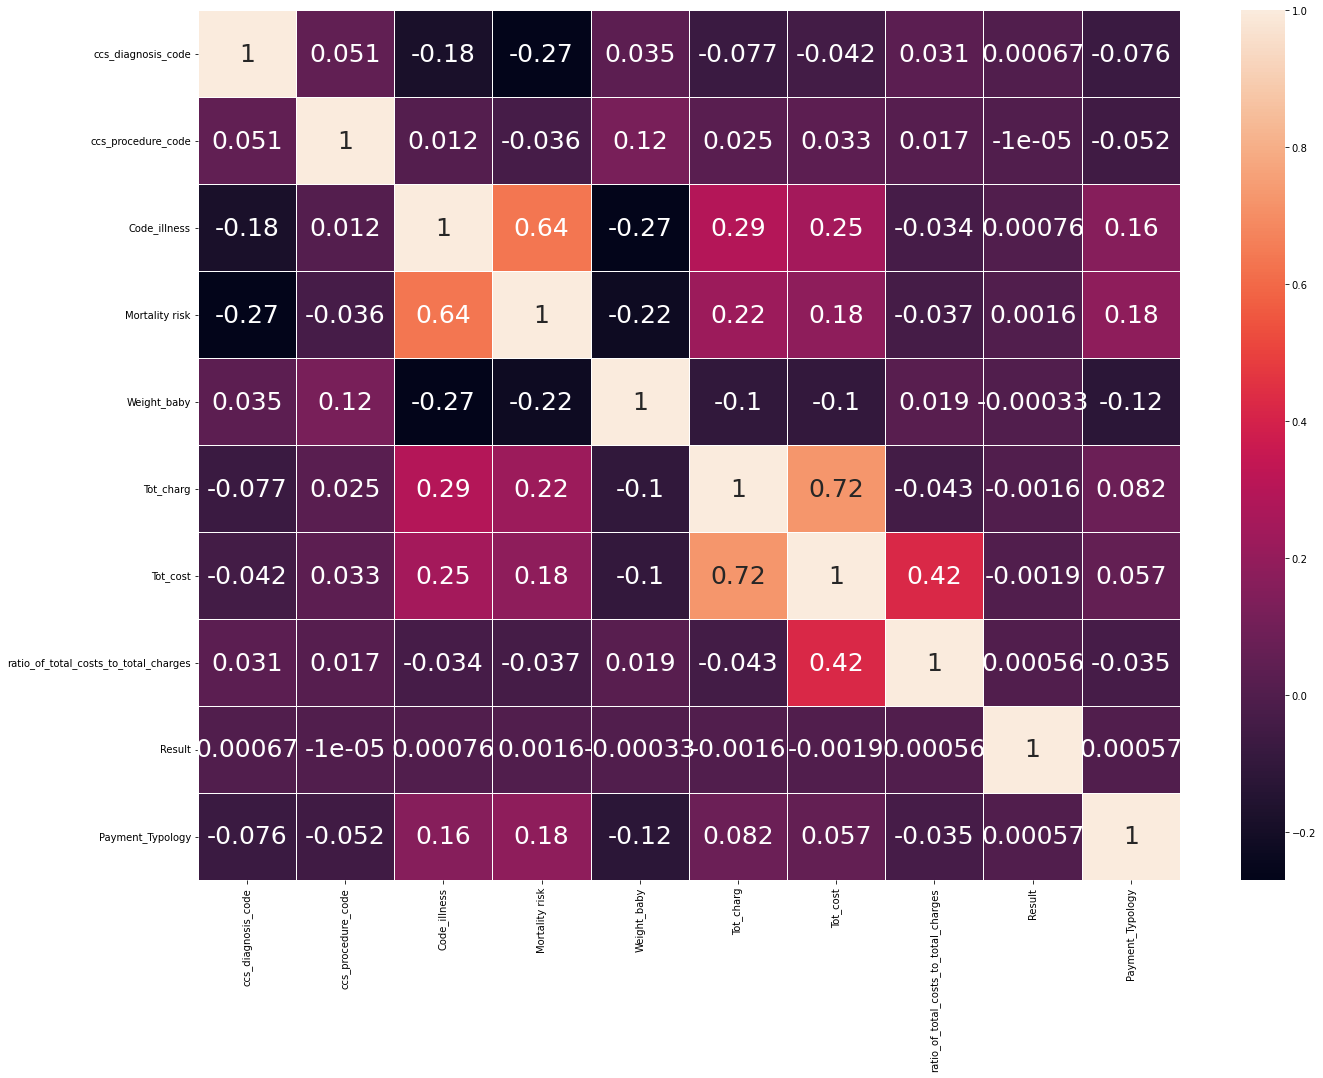

In [115]:
plt.figure(figsize=(22,16))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,annot=True,linewidths=1,annot_kws={'size': 25})